# Payment Date Prediction


### Importing related Libraries 

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from fast_ml.utilities import display
from fast_ml.feature_selection import get_constant_features
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
x=pd.read_csv("E:\downloads copy latest\dataset.csv")
x

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


In [3]:
x.shape

(50000, 19)

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [5]:
print(x.columns)

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')


In [6]:
x.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning



In [7]:
x.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


In [8]:
Null_percentage= x.isnull().sum()*100 / len(x)
Percentage_value = pd.DataFrame({
        'Null_percentage': Null_percentage})
Percentage_value

,Null_percentage
business_code,0.000
cust_number,0.000
name_customer,0.000
clear_date,20.000
buisness_year,0.000
doc_id,0.000
posting_date,0.000
document_create_date,0.000
document_create_date.1,0.000
due_in_date,0.000


In [9]:
Display_two_columns = x[['invoice_id','doc_id']]
Display_two_columns

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


In [10]:
Display_two_columns.corr()

,invoice_id,doc_id
invoice_id,1.0,1.0
doc_id,1.0,1.0


In [11]:
check_date_dup = x[['baseline_create_date','document_create_date','document_create_date.1']]
check_date_dup

,baseline_create_date,document_create_date,document_create_date.1
0,20200126.0,20200125,20200126
1,20190722.0,20190722,20190722
2,20190914.0,20190914,20190914
3,20200331.0,20200330,20200330
4,20191113.0,20191113,20191113
...,...,...,...
49995,20200421.0,20200417,20200421
49996,20190815.0,20190814,20190815
49997,20200219.0,20200218,20200219
49998,20191127.0,20191126,20191127


In [12]:
check_date_dup.corr()

,baseline_create_date,document_create_date,document_create_date.1
baseline_create_date,1.000000,0.994078,0.999527
document_create_date,0.994078,1.000000,0.994547
document_create_date.1,0.999527,0.994547,1.000000


In [13]:
x["isOpen"].nunique()

2

In [14]:
x.drop(["area_business",
        "posting_id",
        "invoice_id",
        "document_create_date",
        "isOpen",
        "document type",
        "document_create_date.1"],axis='columns', inplace=True)

In [15]:
x.shape

(50000, 12)

In [16]:
x

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200506.0,USD,3187.86,20200421.0,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190830.0,USD,6766.54,20190815.0,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200305.0,USD,6120.86,20200219.0,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191212.0,USD,63.48,20191127.0,NAA8


In [17]:
duplicated_rows= x[x.duplicated()]
duplicated_rows

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


In [19]:
x.duplicated().sum()

1161

In [20]:
main_DataFrame=x.drop_duplicates(subset=None, keep='first', inplace=False)
main_DataFrame

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200506.0,USD,3187.86,20200421.0,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190830.0,USD,6766.54,20190815.0,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200305.0,USD,6120.86,20200219.0,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191212.0,USD,63.48,20191127.0,NAA8


In [21]:
main_DataFrame.duplicated().sum()

0

In [22]:
main_DataFrame.shape

(48839, 12)

In [23]:
main_DataFrame.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

In [24]:
main_DataFrame.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

In [29]:
 main_DataFrame[["clear_date","posting_date","due_in_date","baseline_create_date"]].dtypes


clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

### converting date columns into date time formats




In [28]:
'''
- clear_date  
- posting_date
- due_in_date 
- baseline_create_date'''

main_DataFrame["clear_date"] = pd.to_datetime(main_DataFrame["clear_date"])
main_DataFrame["posting_date"] = pd.to_datetime(main_DataFrame["posting_date"])
main_DataFrame["due_in_date"] = pd.to_datetime(main_DataFrame["due_in_date"],format="%Y%m%d")
main_DataFrame["baseline_create_date"] = pd.to_datetime(main_DataFrame["baseline_create_date"],format="%Y%m%d")
main_DataFrame





,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8


In [30]:
main_DataFrame.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD



In [31]:
USD_count=(main_DataFrame["invoice_currency"]=="USD").sum()
print("USD count:",USD_count)
CAD_count=(main_DataFrame["invoice_currency"]=="CAD").sum()
print("CAD count:",CAD_count)




USD count: 45011
CAD count: 3828


In [32]:
value_totalOpenAmount=main_DataFrame["total_open_amount"].sum()
print("Value:",value_totalOpenAmount)

Value: 1578424021.0700002




- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [33]:
convert_currency = main_DataFrame[main_DataFrame["invoice_currency"]=="CAD"].total_open_amount*0.7
converted_USD = pd.DataFrame({
        'converted_USD':convert_currency})
converted_USD

,converted_USD
3,2309.790
5,15558.088
25,64982.589
29,33889.296
44,22200.822
...,...
49863,1153.152
49879,32687.550
49926,4009.110
49949,65370.767


In [34]:
main_DataFrame["converted_USD"]= converted_USD
main_DataFrame

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_USD
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,NaN
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,NaN
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,NaN
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10,2309.79
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8,NaN
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4,NaN
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8,NaN
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8,NaN


In [37]:
main_DataFrame['converted_USD'].fillna(main_DataFrame['total_open_amount'],inplace=True)
main_DataFrame

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_USD
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,54273.28
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,2253.86
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10,2309.79
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,33133.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8,3187.86
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4,6766.54
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8,6120.86
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8,63.48


In [38]:
main_DataFrame["invoice_currency"].replace(to_replace="CAD",value="USD",inplace=True)
main_DataFrame

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_USD
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,54273.28
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,2253.86
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,USD,3299.70,2020-03-31,CA10,2309.79
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,33133.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8,3187.86
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4,6766.54
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8,6120.86
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8,63.48


In [35]:
main_DataFrame["buisness_year"].value_counts()


2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

In [40]:
new_data= main_DataFrame.drop(["invoice_currency","total_open_amount"],axis=1)
new_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_USD
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29
...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,2020-04-21,NAA8,3187.86
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.54
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.86
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.48


In [41]:
len(new_data.columns)

11

# Splitting the Dataset 

### Looking for all columns containing null value


In [42]:
columns_with_null = new_data.columns[new_data.isna().any()].tolist()
print(columns_with_null)

['clear_date']


In [43]:
null_in_column= new_data["clear_date"].isna().sum()
print("no. of null in column is:",null_in_column)

no. of null in column is: 9681


### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [44]:
maindata = new_data[new_data["clear_date"].notnull()]
nulldata = new_data[new_data["clear_date"].isnull()]

In [45]:
maindata = new_data[new_data["clear_date"].notnull()]
nulldata = new_data[new_data["clear_date"].isnull()]

In [46]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_USD
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [47]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_USD
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06



- Formula - Delay = clear_date - due_in_date

In [48]:
maindata["Delay"]= maindata["clear_date"]-maindata["due_in_date"]
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_USD,Delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days


### Generating a new column "avgdelay" from the existing columns

- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [49]:
avgdelay= maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)
avgdelay

name_customer
11078 us                 17 days 00:00:00
17135 associates       -10 days +00:00:00
17135 llc               -3 days +00:00:00
236008 associates       -3 days +00:00:00
99 CE                     2 days 00:00:00
                              ...        
YEN BROS corp             0 days 00:00:00
YEN BROS corporation    -1 days +12:00:00
YEN BROS llc            -2 days +00:00:00
ZARCO co                -1 days +00:00:00
ZIYAD  us                 6 days 00:00:00
Name: Delay, Length: 3889, dtype: timedelta64[ns]

In [51]:
maindata["avg_delay"]= maindata["name_customer"].map(avgdelay)
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_USD,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-3 days +07:08:49.779837776
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,19 days 00:00:00
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,8 days 02:10:54.545454545
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-3 days +19:33:27.692307693
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,71 days 10:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-1 days +14:45:00
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-3 days +12:40:08.540925267
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,1 days 01:08:34.285714285
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1 days 13:36:42.985074626


In [52]:
avg_delay_seconds= maindata["avg_delay"].dt.total_seconds()
avg_delay_seconds


0       -2.334702e+05
1        1.641600e+06
2        6.990545e+05
4       -1.887923e+05
5        6.172800e+06
             ...     
49994   -3.330000e+04
49996   -2.135915e+05
49997    9.051429e+04
49998    1.354030e+05
49999   -3.371478e+05
Name: avg_delay, Length: 39158, dtype: float64

In [53]:
maindata["avg_delay"]= avg_delay_seconds

In [54]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_USD,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-3.330000e+04
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1.354030e+05


In [55]:
maindata.drop(["Delay","clear_date"],axis=1,inplace=True)
maindata

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_USD,avg_delay
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,-2.334702e+05
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,1.641600e+06
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-1.887923e+05
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,-3.330000e+04
49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,1.354030e+05


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe



In [56]:
X= maindata.drop(labels="avg_delay",axis=1)

In [57]:
y= maindata.drop(labels=["name_customer",
                         "converted_USD",
                         "business_code",
                         "cust_number",
                         "buisness_year",
                         "doc_id",
                         "posting_date",
                         "due_in_date","baseline_create_date","cust_payment_terms"],axis=1)

In [58]:
X_train,X_loc_test,y_train,y_loc_test= train_test_split(X, y, test_size=0.4)

In [62]:
X_train.shape

(23494, 10)

In [63]:
X_loc_test.shape

(15664, 10)

In [64]:
y_train.shape

(23494, 1)

In [65]:
y_loc_test.shape

(15664, 1)

In [66]:
 X_val, X_test, y_val, y_test= train_test_split(X_loc_test, y_loc_test, test_size=0.5)

In [67]:
X_val.shape

(7832, 10)

In [68]:
X_test.shape

(7832, 10)

In [69]:
y_val.shape

(7832, 1)

In [71]:
y_test.shape

(7832, 1)

# Exploratory Data Analysis (EDA) 

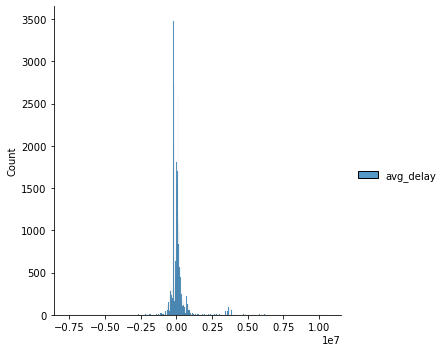

In [78]:
sns.displot(y)

In [73]:
stored=X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()


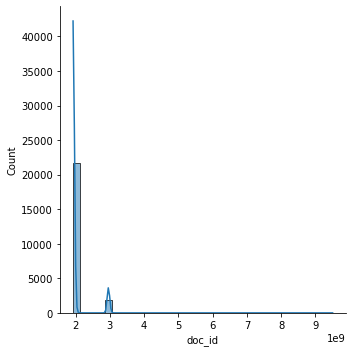

In [74]:
sns.displot(X_train['doc_id'],kde=True,bins=40) 

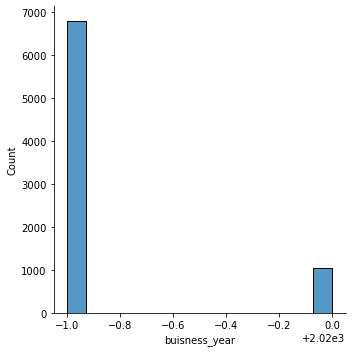

In [76]:
sns.displot(X_val['buisness_year'])

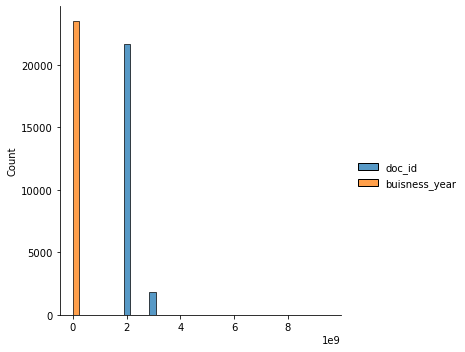

In [77]:
sns.displot((X_train['doc_id'],X_train["buisness_year"]),kde=False,bins=40) 

# Feature Engineering 

In [79]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_USD
18981,U001,0200726979,BJ'S co,2020.0,1.930476e+09,2020-02-05,2020-02-20,2020-02-05,NAA8,35.76
9770,U001,0100001452,COASTAL us,2020.0,1.930368e+09,2020-01-10,2020-01-30,2020-01-10,NAD1,1277.82
17029,U001,0200756072,REINHA systems,2019.0,1.928805e+09,2019-02-15,2019-03-02,2019-02-15,NAA8,34543.92
14102,U001,0200739006,AL associates,2019.0,1.929792e+09,2019-08-28,2019-09-12,2019-08-28,NAA8,20934.36
6032,U001,0200769623,WAL-MAR co,2019.0,1.930249e+09,2019-12-08,2019-12-23,2019-12-08,NAH4,42869.45
...,...,...,...,...,...,...,...,...,...,...
12935,U001,0200769623,WAL-MAR foundation,2019.0,1.929655e+09,2019-07-24,2019-08-08,2019-07-24,NAH4,44241.65
49327,U001,0200769623,WAL-MAR foundation,2020.0,1.930378e+09,2020-01-10,2020-01-25,2020-01-10,NAH4,15585.60
39726,U001,0200705742,DOT us,2020.0,1.930381e+09,2020-01-07,2020-02-10,2020-01-07,NAAW,6277.64
28293,U001,0200793568,SUPE corporation,2019.0,1.928551e+09,2019-01-03,2019-01-18,2019-01-03,NAA8,22179.83


In [80]:
X_train.describe()

,buisness_year,doc_id,converted_USD
count,23494.000000,2.349400e+04,23494.000000
mean,2019.131736,2.012287e+09,30618.974736
std,0.338210,2.857736e+08,36508.958983
min,2019.000000,1.928511e+09,2.400000
25%,2019.000000,1.929181e+09,4608.000000
50%,2019.000000,1.929734e+09,16861.850000
75%,2019.000000,1.930209e+09,45059.873750
max,2020.000000,9.500000e+09,632134.240000


In [81]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit_transform(X_train["business_code"])

array([1, 1, 1, ..., 1, 1, 1])

### We are encoding business _ code in all our dataset

In [82]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [83]:
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

In [84]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])

In [85]:
X_train[["business_code","business_code_enc"]]

,business_code,business_code_enc
18981,U001,1
9770,U001,1
17029,U001,1
14102,U001,1
6032,U001,1
...,...,...
12935,U001,1
49327,U001,1
39726,U001,1
28293,U001,1


In [86]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [87]:
X_train,X_val , X_test = custom(['business_code'])

In [88]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


In [89]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [90]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

In [91]:
X_train ,X_val, X_test = custom(['name_customer'])

In [92]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [93]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

In [94]:
X_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_USD                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [95]:
X_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_USD                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [96]:
X_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_USD                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

In [97]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



In [98]:
X_train ,X_val, X_test = custom(['posting_date'])

In [99]:
X_train['day_of_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_create_date'] = X_train['baseline_create_date'].dt.year

X_val['day_of_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_create_date'] = X_val['baseline_create_date'].dt.year


X_test['day_of_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_create_date'] = X_test['baseline_create_date'].dt.year


In [100]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

In [101]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year


In [102]:
X_train ,X_val, X_test = custom(['due_in_date'])

In [103]:
X_train.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_USD             float64
business_code_enc           int32
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_create_date          int64
month_of_create_date        int64
year_of_create_date         int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 


In [104]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

In [105]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


In [106]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value


In [107]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [108]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['month_of_create_date',
 'year_of_postingdate',
 'day_of_create_date',
 'year_of_due',
 'year_of_create_date',
 'month_of_due']

### Heatmap for X_train



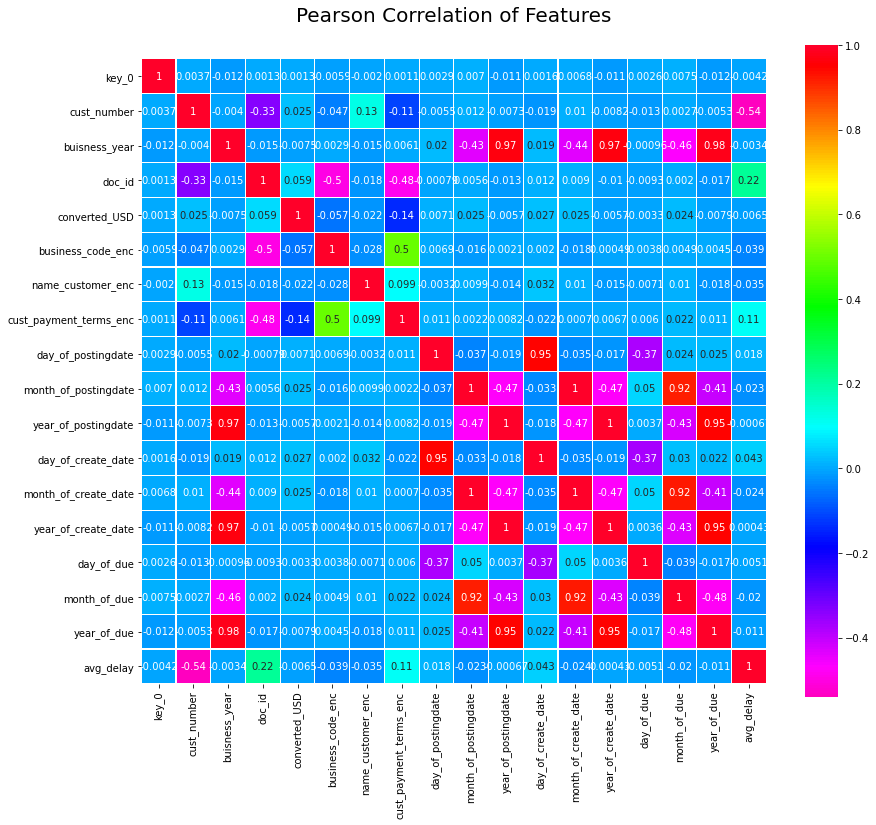

In [110]:
import matplotlib.pyplot as plt
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

In [111]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [112]:
sel.variances_

array([1.81090436e+15, 1.14381451e-01, 8.16630944e+16, 1.33284735e+09,
       2.89868526e-01, 1.07807832e+06, 1.29595586e+02, 7.61646929e+01,
       1.23283867e+01, 1.15319064e-01, 7.77582801e+01, 1.23312486e+01,
       1.15458063e-01, 7.57954203e+01, 1.21494771e+01, 1.17529284e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### Different evaluation matrix 

- MSE
- R2
- Algorithm

In [113]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [114]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [115]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [116]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

564983.112485716

### Display The Comparison Lists

In [117]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[323422217825.37366],[0.3298960103725196],

In [118]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

In [119]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [122]:
predict_test= clf.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

687971.3801715741

### Display The Comparison Lists

In [123]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[323422217825.37366, 487598387766.6956],[0.3298960103725196, -0.010263386279814934],

In [124]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append("Decision")
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

predicted = decision_tree.predict(X_test)

In [125]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [126]:
predict_test= decision_tree.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

444195.6865222846

### Display The Comparison Lists

In [127]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision'],[323422217825.37366, 487598387766.6956, 177106442344.81705],[0.3298960103725196, -0.010263386279814934, 0.6330501522067036],

In [128]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append("RandomForest")
random_forest= RandomForestRegressor()
random_forest.fit(X_train,y_train)

predicted= random_forest.predict(X_test)

In [129]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [130]:
predict_test= random_forest.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

361927.7605064792

### Display The Comparison Lists


In [131]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision', 'RandomForest'],[323422217825.37366, 487598387766.6956, 177106442344.81705, 133621159558.03459],[0.3298960103725196, -0.010263386279814934, 0.6330501522067036, 0.723148048638901],

In [133]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [134]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [135]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

338439.79849357135

In [136]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision', 'RandomForest', 'XGB Regressor', 'XGB Regressor'],[323422217825.37366, 487598387766.6956, 177106442344.81705, 133621159558.03459, 118157957143.02748],[0.3298960103725196, -0.010263386279814934, 0.6330501522067036, 0.723148048638901, 0.7551865205175037],

## comparison dataframe 

In [137]:
comparision= pd.DataFrame(zip(Algorithm,MSE_Score,R2_Score),columns=["Algorithm","MSE_Score","R2_Score"])

comparision

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,3.234222e+11,0.329896
1,Support Vector Regression,4.875984e+11,-0.010263
2,Decision,1.771064e+11,0.633050
3,RandomForest,1.336212e+11,0.723148
4,XGB Regressor,1.181580e+11,0.755187


In [138]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

In [139]:
mean_squared_error(y_test,predictedfinal,squared=False)

343741.11936605355

In [140]:
mean_squared_error(y_val,predictedfinal,squared=False)

920600.503312471

In [141]:
r2_score(y_test, predictedfinal)

0.7551865205175037

In [142]:
r2_score(y_val,predictedfinal)

-0.8056615630998469

### The Accuracy for train Dataset 

In [143]:
regressorfinal.score(X_train, y_train)

0.9539435836682798

###  The accuracy for validation

In [144]:
regressorfinal.score(X_test,y_test)

0.7551865205175037

### The accuracy for test

In [145]:
regressorfinal.score(X_val,y_val)

0.755962373181926

## Our Best Model is XGB Regressor


The model i chose is XGB Regressor.

what is a XGB Regressor?
Ans: 
XGBoost is a gradient boosting package that implements a gradient boosting framework. The algorithm is scalable for parallel computing. In addition to Python, it is available in C++, Java, R, Julia, and other computational languages. XGBoost has gained attention in machine learning competitions as an algorithm of choice for classification and regression.

Why This specific model?
As we can see the comparision table, among all the algorithms, the effiuciency and performance in XGB regressor is better than any other model. As we can see, it has the lowest mean squared error score and highest R2 score. 
And along with that using this model has some more advantages.
Some of them are:-
 1. Effective with large data sets. 
 2. Tree algorithms such as XGBoost and Random Forest do not need normalized features and work well if the data is nonlinear, non-  monotonic, or with segregated clusters.
 3. It has in built capacity to handle missing /null values.
 
So, these are the reasons i chose XGB Regressor.
 

## Now we will perform the same operations on the Nulldata dataframe into this machine learning model


In [146]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_USD
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


In [147]:
nulldata.shape

(9681, 11)

In [148]:
nulldata.describe()

,buisness_year,doc_id,converted_USD
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


In [149]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_USD         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 907.6+ KB


In [150]:
nulldata1 = nulldata.copy()

In [151]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

In [152]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

In [153]:
nulldata['day_of_create_date'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_create_date'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_create_date'] = nulldata['baseline_create_date'].dt.year

nulldata['day_of_posting_date'] = nulldata['posting_date'].dt.day
nulldata['month_of_posting_date'] = nulldata['posting_date'].dt.month
nulldata['year_of_posting_date'] = nulldata['posting_date'].dt.year


nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year


nulldata['day_of_clear_date'] = nulldata['clear_date'].dt.day
nulldata['month_of_clear_date'] = nulldata['clear_date'].dt.month
nulldata['year_of_clear_date'] = nulldata['clear_date'].dt.year


In [154]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


In [155]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_USD                    float64
business_code_enc                  int64
day_of_create_date                 int64
month_of_create_date               int64
year_of_create_date                int64
day_of_posting_date                int64
month_of_posting_date              int64
year_of_posting_date               int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_clear_date                float64
month_of_clear_date              float64
year_of_clear_date               float64
cust_payment_ter

In [156]:
nulldata.drop(["business_code",
"baseline_create_date",
"due_in_date",
"posting_date",
"name_customer",
"clear_date",
"cust_payment_terms",
'day_of_clear_date',
"month_of_clear_date",
"year_of_clear_date"],axis=1,inplace=True)

In [157]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_USD           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_create_date      9681 non-null   int64  
 6   month_of_create_date    9681 non-null   int64  
 7   year_of_create_date     9681 non-null   int64  
 8   day_of_posting_date     9681 non-null   int64  
 9   month_of_posting_date   9681 non-null   int64  
 10  year_of_posting_date    9681 non-null   int64  
 11  day_of_due              9681 non-null   int64  
 12  month_of_due            9681 non-null   int64  
 13  year_of_due             9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [158]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_USD           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_create_date      9681 non-null   int64  
 6   month_of_create_date    9681 non-null   int64  
 7   year_of_create_date     9681 non-null   int64  
 8   day_of_posting_date     9681 non-null   int64  
 9   month_of_posting_date   9681 non-null   int64  
 10  year_of_posting_date    9681 non-null   int64  
 11  day_of_due              9681 non-null   int64  
 12  month_of_due            9681 non-null   int64  
 13  year_of_due             9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [159]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 16297 to 49487
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int32  
 1   buisness_year           7832 non-null   float64
 2   doc_id                  7832 non-null   float64
 3   converted_USD           7832 non-null   float64
 4   business_code_enc       7832 non-null   int32  
 5   name_customer_enc       7832 non-null   int64  
 6   cust_payment_terms_enc  7832 non-null   int64  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_create_date      7832 non-null   int64  
 11  month_of_create_date    7832 non-null   int64  
 12  year_of_create_date     7832 non-null   int64  
 13  day_of_due              7832 non-null   int64  
 14  month_of_due            7832 non-nu

### We can notice that there is a mismatch in the column sequence while compairing the dataframes

- Note:We need to edit the sequence of "nulldata", similar to the "X_test" dataframe

In [160]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_USD',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_create_date', 'month_of_create_date', 'year_of_create_date',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [161]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_USD',
       'business_code_enc', 'day_of_create_date', 'month_of_create_date',
       'year_of_create_date', 'day_of_posting_date', 'month_of_posting_date',
       'year_of_posting_date', 'day_of_due', 'month_of_due', 'year_of_due',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [163]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_USD',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_posting_date', 'month_of_posting_date', 'year_of_posting_date',
       'day_of_create_date', 'month_of_create_date', 'year_of_create_date',
       'day_of_due', 'month_of_due', 'year_of_due']] 

### Display the Final Dataset

In [164]:
nulldata2

,cust_number,buisness_year,doc_id,converted_USD,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_create_date,month_of_create_date,year_of_create_date,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,65,2732,4,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.02,65,2816,18,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.59,65,86,18,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.65,65,2049,18,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.06,65,735,33,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,65,3003,31,10,3,2020,10,3,2020,25,3,2020
49980,200769623,2020.0,1.930851e+09,8899.71,65,3001,31,3,5,2020,3,5,2020,18,5,2020
49982,200148860,2020.0,1.930638e+09,4967.06,65,815,18,11,3,2020,11,3,2020,26,3,2020
49992,200900909,2020.0,1.930702e+09,1998.64,65,2779,18,25,3,2020,25,3,2020,9,4,2020


In [165]:
final_result = regressorfinal.predict(nulldata2)

In [166]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [167]:
final_result

0       657086.687500
1       430824.500000
2        50752.636719
3       549027.000000
4       215011.296875
            ...      
9676    401202.875000
9677    713874.312500
9678   -119580.328125
9679    458269.812500
9680    613544.750000
Name: avg_delay, Length: 9681, dtype: float32

### Now we are merging this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps.

In [168]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [169]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_USD,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,657086.687500
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,430824.500000
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,50752.636719
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,549027.000000
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,215011.296875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,401202.875000
9677,49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,713874.312500
9678,49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,-119580.328125
9679,49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,458269.812500


In [170]:
Final.shape

(9681, 13)

In [171]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

In [174]:
Final["clear_date"]

0      2020-04-17 14:31:26.687500000
1      2020-04-07 23:40:24.500000000
2      2020-03-26 14:05:52.636718750
3      2020-05-06 08:30:27.000000000
4      2020-04-28 11:43:31.296875000
                    ...             
9676   2020-03-29 15:26:42.875000000
9677   2020-05-26 06:17:54.312500000
9678   2020-03-24 14:46:59.671875000
9679   2020-04-14 07:17:49.812500000
9680   2020-05-13 02:25:44.750000000
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)


In [175]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

In [176]:
Final["avg_delay"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9676    0.0
9677    0.0
9678   -1.0
9679    0.0
9680    0.0
Name: avg_delay, Length: 9681, dtype: float64

### We are converting average delay column into aging bucket





In [178]:

#bins= [0,15,30,45,60,100]
#labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
#Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

#this is the pre code given by you but in the dataset there are some cases in which clients paid the amount before the due in 
#date which resulted in null values in aging bucket. i modified the code and added one parameter each in bins and labels to 
#handle those null values. Kindly look that. 

bins= [-30,0,15,30,45,60,100]
labels = ['paid before','0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

In [179]:
Final.drop(["key_0","avg_delay"],axis=1,inplace=True)

In [180]:
Final['Aging Bucket'].value_counts()

0-15               8690
paid before         991
16-30                 0
31-45                 0
46-60                 0
Greatar than 60       0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [181]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_USD,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-17 14:31:26.687500000,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0-15
1,U001,0200744019,TARG us,2020-04-07 23:40:24.500000000,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,0200418007,AM,2020-03-26 14:05:52.636718750,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,0-15
3,U001,0200739534,OK systems,2020-05-06 08:30:27.000000000,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,0-15
4,U001,0200353024,DECA corporation,2020-04-28 11:43:31.296875000,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,2020-03-29 15:26:42.875000000,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,0-15
9677,U001,0200769623,WAL-MAR corporation,2020-05-26 06:17:54.312500000,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,0-15
9678,U001,0200148860,DOLLA co,2020-03-24 14:46:59.671875000,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,paid before
9679,U001,0200900909,SYSCO co,2020-04-14 07:17:49.812500000,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,0-15


### Store this dataframe into the .csv format

In [182]:
Final.to_csv(r'C:\Users\LALITH\Desktop\desktop\HRC71640W_CHENNAMALLA LALITH KUMAR.csv', index=False)

# END OF THE PROJECT